In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#shape shows the number of rows and columns in the dataset
dataset = pd.read_csv('red-wine.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
feature_list = dataset.columns[:-1].values
label = [dataset.columns[-1]]

print("Features: ", feature_list)
print("Labels: ", label)

Features:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Labels:  ['quality']


In [32]:
#Info is used to obtain a concise summary of dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [33]:
#.describe() function gives a statistical summary of the dataset
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
#value_counts() is used to find the occurance of unique values with the number of occurance
dataset.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [37]:
#For checking any null values in dataset

dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [39]:
#this does the train and validation split
#sample randomly selects rows and frac decides the fraction of rows to be included in sample
# in valid_df we make a dataset by dropping values that are in train_df

train_df = dataset.sample(frac=0.7, random_state=42)
valid_df = dataset.drop(train_df.index)
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


In [41]:
#we are normalizing the data here and the scale will be between 0 to 1

max_=train_df.max(axis=0)
min_=train_df.min(axis=0)
train_df=(train_df - min_)/(max_- min_)
valid_df=(valid_df - min_)/(max_ - min_)
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,0.274336,0.301370,0.101266,0.109589,0.170284,0.183099,0.147059,0.516153,0.330435,0.200000,0.184615,0.6
124,0.283186,0.260274,0.215190,0.047945,0.116861,0.281690,0.352941,0.435389,0.460870,0.090909,0.169231,0.4
350,0.539823,0.376712,0.278481,0.123288,0.158598,0.225352,0.102941,0.758443,0.365217,0.393939,0.230769,0.6
682,0.345133,0.232877,0.392405,0.092466,0.110184,0.436620,0.191176,0.582232,0.408696,0.127273,0.215385,0.4
1326,0.185841,0.232877,0.303797,0.054795,0.108514,0.239437,0.102941,0.347283,0.460870,0.163636,0.338462,0.6


In [45]:
#drop is used to drop quality from train dataset because we will predict it as it is our target column 
X_train=train_df.drop('quality',axis=1)
X_valid=valid_df.drop('quality',axis=1)
y_train=train_df['quality']
y_valid=valid_df['quality']

print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_valid',X_valid.shape)
print('y_valid',y_valid.shape)

X_train (1119, 11)
y_train (1119,)
X_valid (480, 11)
y_valid (480,)


In [46]:
#   MODEL BUILDING 

from tensorflow import keras
from tensorflow.keras import layers


model=keras.Sequential([
    layers.Dense(units = 512, activation = 'relu', input_shape=[11]),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1),
])

model.compile(
    optimizer = 'adam',
    loss = 'mae',
)

history=model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size =256,
    epochs = 15,
)

Epoch 1/15
5/5 [==============================] - 2s 76ms/step - loss: 0.2678 - val_loss: 0.1260
Epoch 2/15
5/5 [==============================] - 0s 23ms/step - loss: 0.1506 - val_loss: 0.1193
Epoch 3/15
5/5 [==============================] - 0s 18ms/step - loss: 0.1319 - val_loss: 0.1133
Epoch 4/15
5/5 [==============================] - 0s 17ms/step - loss: 0.1200 - val_loss: 0.1035
Epoch 5/15
5/5 [==============================] - 0s 17ms/step - loss: 0.1122 - val_loss: 0.0979
Epoch 6/15
5/5 [==============================] - 0s 17ms/step - loss: 0.1104 - val_loss: 0.0966
Epoch 7/15
5/5 [==============================] - 0s 20ms/step - loss: 0.1077 - val_loss: 0.0946
Epoch 8/15
5/5 [==============================] - 0s 28ms/step - loss: 0.1047 - val_loss: 0.0940
Epoch 9/15
5/5 [==============================] - 0s 29ms/step - loss: 0.1031 - val_loss: 0.0951
Epoch 10/15
5/5 [==============================] - 0s 26ms/step - loss: 0.1028 - val_loss: 0.0932
Epoch 11/15
5/5 [============

<AxesSubplot:>

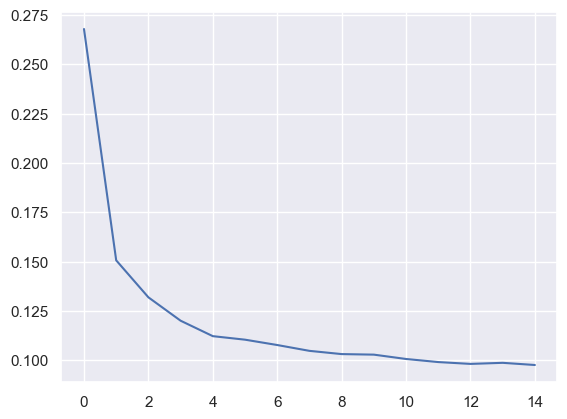

In [47]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()

In [55]:
model2 = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),    #used 3 layer network
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

model2.compile(
    optimizer='adam',
    loss='mae',
)

In [56]:
#We use early stopping to avoid overfitting. Earlystopping works after every epoch
# min_delta is min amount of change that could be improvement
# patience is how many epochs it should wait for before stopping
#Setting verbose to 1 prints training progress information during each epoch.

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.001,  
    patience = 20,
    restore_best_weights = True,
)

history2= model2.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 256,
    epochs = 400,
    callbacks=[early_stopping],
    verbose = 1,
)

Epoch 1/400
5/5 [==============================] - 1s 96ms/step - loss: 0.2803 - val_loss: 0.1262
Epoch 2/400
5/5 [==============================] - 0s 32ms/step - loss: 0.1549 - val_loss: 0.1154
Epoch 3/400
5/5 [==============================] - 0s 33ms/step - loss: 0.1337 - val_loss: 0.1074
Epoch 4/400
5/5 [==============================] - 0s 34ms/step - loss: 0.1221 - val_loss: 0.1004
Epoch 5/400
5/5 [==============================] - 0s 34ms/step - loss: 0.1165 - val_loss: 0.0980
Epoch 6/400
5/5 [==============================] - 0s 41ms/step - loss: 0.1133 - val_loss: 0.0970
Epoch 7/400
5/5 [==============================] - 0s 43ms/step - loss: 0.1096 - val_loss: 0.0959
Epoch 8/400
5/5 [==============================] - 0s 29ms/step - loss: 0.1061 - val_loss: 0.0956
Epoch 9/400
5/5 [==============================] - 0s 30ms/step - loss: 0.1053 - val_loss: 0.0942
Epoch 10/400
5/5 [==============================] - 0s 27ms/step - loss: 0.1030 - val_loss: 0.0940
Epoch 11/400
5/5 [=

Minimum validation loss: 0.08948002010583878


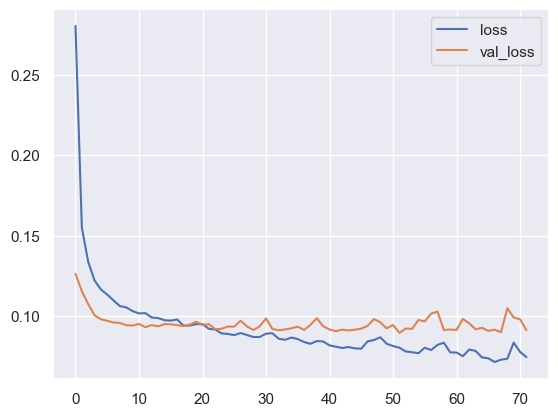

In [57]:
history_df2=pd.DataFrame(history2.history)
history_df2.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df2['val_loss'].min()))